# TALLER APC
- William Martínez
- Laura González
- William Gomez

In [1]:
install.packages(c("corrplot","psych","FactoMineR","factoextra","reshape2","RColorBrewer"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘viridis’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘mnormt’, ‘GPArotation’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggrepel’, ‘abind’, ‘dendextend’, ‘ggpubr’, ‘plyr’




In [20]:
library(readxl)
HATCO_data <- read_excel("HATCO_data.xlsx")
HATCO_data <- HATCO_data[,c(2,3,4,5,7,8)]
str(HATCO_data)

tibble [100 × 6] (S3: tbl_df/tbl/data.frame)
 $ X1: num [1:100] 4.1 1.8 3.4 2.7 6 1.9 4.6 1.3 5.5 4 ...
 $ X2: num [1:100] 0.6 3 5.2 1 0.9 3.3 2.4 4.2 1.6 3.5 ...
 $ X3: num [1:100] 6.9 6.3 5.7 7.1 9.6 7.9 9.5 6.2 9.4 6.5 ...
 $ X4: num [1:100] 4.7 6.6 6 5.9 7.8 4.8 6.6 5.1 4.7 6 ...
 $ X6: num [1:100] 2.3 4 2.7 2.3 4.6 1.9 4.5 2.2 3 3.2 ...
 $ X7: num [1:100] 5.2 8.4 8.2 7.8 4.5 9.7 7.6 6.9 7.6 8.7 ...


In [21]:
cov(HATCO_data)

,X1,X2,X3,X4,X6,X7
X1,1.74431818,-0.5514747,0.93261616,0.07533333,0.07851010,-1.0104697
X2,-0.55147475,1.4296000,-0.80769293,0.36821010,0.17165657,0.8903596
X3,0.93261616,-0.8076929,1.92238788,-0.18213333,-0.03667677,-0.9849232
X4,0.07533333,0.3682101,-0.18213333,1.28009697,0.68745455,0.3586788
X6,0.07851010,0.1716566,-0.03667677,0.68745455,0.59421717,0.2166515
X7,-1.01046970,0.8903596,-0.98492323,0.35867879,0.21665152,2.5129889


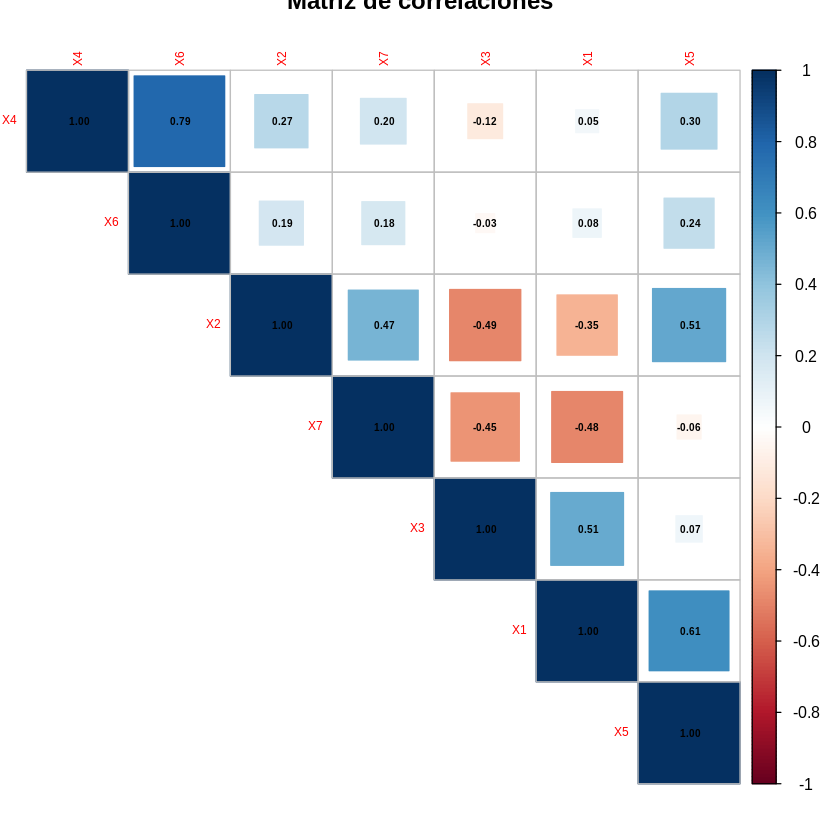

In [22]:
library("corrplot")
#creo matriz de correlaciones
R<-cor(HATCO_data)
#ejecuto el gráfico
corrplot(base, type="upper",method="square",title="Matriz de correlaciones", tl.cex=0.6,order="hclust", addCoef.col = "black", number.cex=0.5)

**ANÁLISIS:** La matriz de correlaciones indica una alta correlación entre la variable x6 y x4, de igual manera entre las variables x1 y x5. Dado a que estas son las correlaciones miradas individualmente entre las variables, inicialmente podrían indicarnos que sí es pertinente hacer una análisis de reducción de dimensionalidad, aún así es necesario mirarlo en conjunto para saber con seguridad si esto sería lo mejor.

# Prueba de esfericidad de Bartlett

La prueba de Bartlett compara la matriz de correlaciones observada con la matriz de identidad. En otras palabras comprueba si existe cierta redundancia entre las variables que podamos resumir con un número reducido de factores. Si las variables están perfectamente correlacionadas, basta con un solo factor. Si son ortogonales, necesitamos tantos factores como variables. En este último caso, la matriz de correlaciones es igual que la matriz de identidad. Una estrategia sencilla consiste en visualizar la matriz de correlaciones.

In [23]:
library("psych")
cortest.bartlett(R, n = nrow(HATCO_data))

$chisq
[1] 205.9648

$p.value
[1] 1.300631e-35

$df
[1] 15

**ANÁLISIS:**La prueba de esferidad nos confirma que en conjunto, las correlaciones se alejan de la matriz identidad, obtenemos un p-valor de 1.05607281870555e-106 que nos indica que es pertinente hacer una reducción de dimensionalidad.

#Indice KMO

El índice KMO tiene el mismo objetivo de Bartlett. Comprueba si podemos factorizar eficazmente las variables originales. Pero se basa en otra idea.
La matriz de correlaciones es siempre el punto de partida. Sabemos que las variables están más o menos correlacionadas, pero la correlación entre dos variables puede estar influida por las demás. Así pues, utilizamos la correlación parcial para medir la relación entre dos variables eliminando el efecto de las variables restantes. El índice KMO compara los valores de las correlaciones entre variables y los de las correlaciones parciales. Si el índice KMO es alto, el ACP puede actuar eficazmente; si KMO es bajo, el ACP no es pertinente.

Los siguientes criterios son usados para evaluar el KMO:
*   Sobre 0.90 - Maravilloso
*   0.80 a 0.90 - Meritorio
*   0.70 a 0.80 - Promedio
*   0.60 a 0.70 - Mediocre
*   0.50 a 0.60 - Terrible
*   Bajo 0.50 - Inaceptable

También se puede calcular un índice KMO por variable para detectar las que no están relacionadas con las otras

In [24]:
KMO(R)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = R)
Overall MSA =  0.66
MSA for each item = 
  X1   X2   X3   X4   X6   X7 
0.72 0.79 0.75 0.54 0.53 0.78 

**ANÁLISIS:** Al realizar el análisis por índice de KMO, inicialmente se encuentra un índice general inaceptable de 0,45. Revisando los MSA por cada variable se encuentra que la variable X5 cuenta con el menor índice en este campo, por lo que se opta por retirarla del modelo para favorecer una factorización de las variables originales más eficiente.
Una vez realizado el ajuste, el índice MSA general sube a 0.66, demostrando un aumento en la viabilidad de reducción de dimensionalidad y más claridad sobre el proceso.

In [25]:
partial.r(HATCO_data)

,X1,X2,X3,X4,X6,X7
X1,1.00000000,-0.07433373,0.33792240,0.09808303,0.04514773,-0.33084084
X2,-0.07433373,1.00000000,-0.30068877,0.15981431,-0.02564957,0.25313899
X3,0.33792240,-0.30068877,1.00000000,-0.08092034,0.08092762,-0.14883999
X4,0.09808303,0.15981431,-0.08092034,1.00000000,0.76946221,0.02434110
X6,0.04514773,-0.02564957,0.08092762,0.76946221,1.00000000,0.09688964
X7,-0.33084084,0.25313899,-0.14883999,0.02434110,0.09688964,1.00000000


Un paso final de la preparación es estandarizar las variables para evitar problemas relacionados con las diferentes dimensiones en las que vienen dichas variables. Sin embargo, ese paso se hará en la modelación explicada a continuación.

##Modeling

Con la siguiente instrucción aplicamos componentes principales. Observe que estandarizamos las variables con las instrucciones center (restamos la media) y scale (dividimos por la desviación)

In [26]:
componentestotal<-prcomp(HATCO_data, center=TRUE, scale.=TRUE)
summary(componentestotal)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6
Standard deviation     1.5854 1.3189 0.77297 0.72771 0.64477 0.45190
Proportion of Variance 0.4189 0.2899 0.09958 0.08826 0.06929 0.03404
Cumulative Proportion  0.4189 0.7088 0.80842 0.89668 0.96596 1.00000

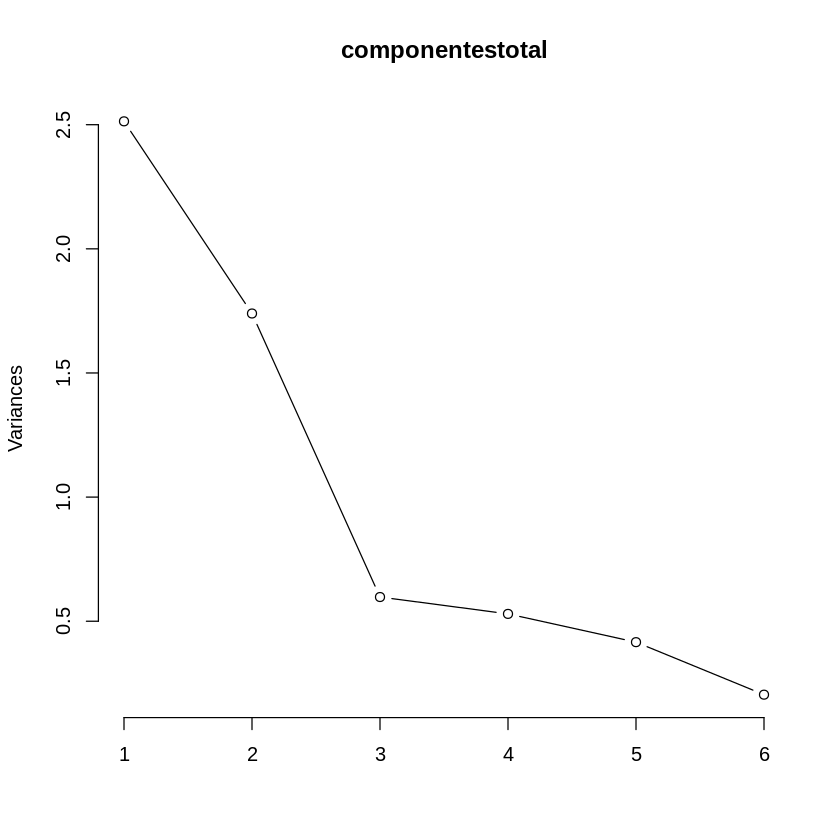

In [27]:
plot(componentestotal, type="l")

**ANÁLISIS:** Al realizar el análisis de componentes  observamos que las primeras 3 componentes representan un 80% de variabilidad. Bajo el criterio de la desviación estándar la 1ra y 2da componente claramente deben ser incluidas en el analisis y observamos que la 3ra es un poco menor a uno.  La grafica nos indica que deberíamos escoger estas primeras 3 componentes pues después de esta se reduce significativamente el aumento en variabilidad. Por lo cual, procederemos a realizar el análisis con 3 componentes.

In [29]:
componentes<-prcomp(HATCO_data, center=TRUE, scale.=TRUE, rank.=3)
print(componentes)

Standard deviations (1, .., p=6):
[1] 1.5853990 1.3189075 0.7729716 0.7277095 0.6447722 0.4519022

Rotation (n x k) = (6 x 3):
          PC1         PC2         PC3
X1 -0.3954166 -0.39003249  0.50671031
X2  0.4785180  0.05148374  0.69769340
X3 -0.4602434 -0.25523834 -0.25782833
X4  0.3117329 -0.60527258 -0.03998713
X6  0.2681590 -0.63053678 -0.19214836
X7  0.4834828  0.12706665 -0.38919554



Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


Using medicion as id variables



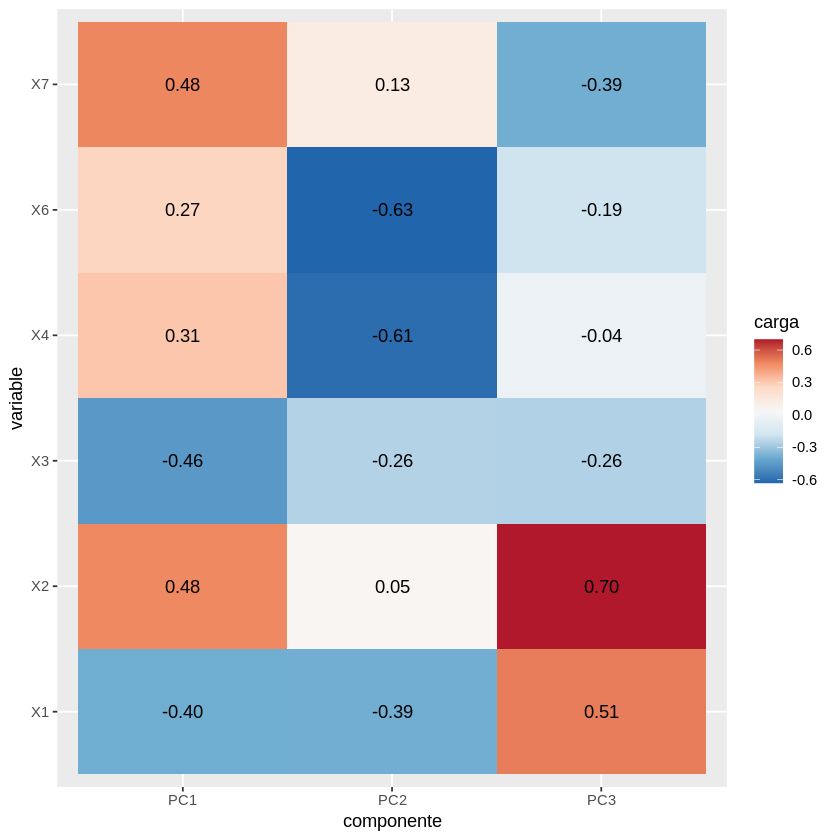

In [30]:
library(reshape2)
library(ggplot2)
cargas<-componentes$rotation
cargasdf<-as.data.frame(cargas)
cargasdf$medicion<-rownames(cargasdf)
cargasheat<-reshape2::melt(cargasdf)
colnames(cargasheat)<-c("variable","componente","carga")
library(ggplot2)
ggplot(cargasheat,aes(x=componente,y=variable,fill=carga, label=sprintf("%0.2f", round(carga, digits=2))))+geom_tile()+scale_fill_distiller(palette="RdBu")+geom_text()

**ANÁLSIS:** A partir de esto, llevándolo al contexto de la situacióny del negocio, se encuentra que el primer componente representa distintas variables que comprenden varios elementos del negocio, incluyendo la velocidad de envío, el nivel de precios, la flexibilidad de precios y la percepción de la calidad del producto, esto no parece ser muy determinante en cuanto a reducción de dimensiones.
El segundo componente representa principalmente las variables de imagen del fabricante y servicio en general. El tercer componente resume principalmente las varianles de velocidad de envío y nivel de precio percibido.
En general no se encuentran resultados determiantes que expresen una clara reducción de dimensionalidad que abarque de una manera ideal cada una de las variables, por lo que se opta por hacer una rotación de ejes verimax.

## ROTACION

**varimax**

In [31]:
library(psych)
componentes2<-principal(HATCO_data,nfactors=3,rotate="varimax")
# rotaciones disponibles: "none", "varimax", "quatimax", "promax", "oblimin", "simplimax", and "cluster"
componentes2$communality # proporcion de la varianza representada por cada componente
componentes2$loadings

X1        X2        X3        X4        X6        X7 
0.8110271 0.8709897 0.6854592 0.8824905 0.8943943 0.7061314


Loadings:
   RC2    RC1    RC3   
X1  0.135  0.872 -0.179
X2  0.176 -0.186  0.897
X3         0.493 -0.665
X4  0.926         0.155
X6  0.945              
X7  0.220 -0.762  0.279

                 RC2   RC1   RC3
SS loadings    1.850 1.619 1.381
Proportion Var 0.308 0.270 0.230
Cumulative Var 0.308 0.578 0.808

Using medicion as id variables



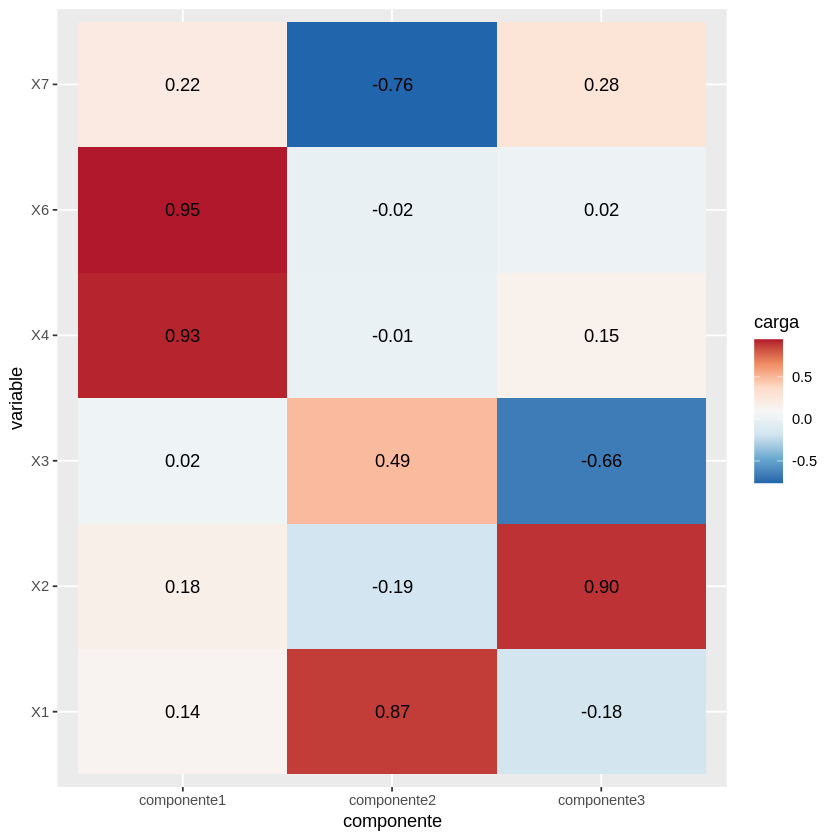

In [37]:
componente1<-componentes2$loadings[,1]
componente2<-componentes2$loadings[,2]
componente3<-componentes2$loadings[,3]

cargasdfr<-as.data.frame(cbind(componente1,componente2,componente3))
cargasdfr$medicion<-rownames(cargasdfr)
cargasheatr<-reshape2::melt(cargasdfr)
colnames(cargasheatr)<-c("variable","componente","carga")
ggplot(cargasheatr,aes(x=componente,y=variable,fill=carga, label=sprintf("%0.2f", round(carga, digits=2))))+geom_tile()+scale_fill_distiller(palette="RdBu")+geom_text()

#             **ANÁLISIS FINAL**

# **ACP**


# **ANÁLISIS FACTORIAL DE 3 COMPONENTES**

- ## **FACTOR PERCEPCIONES INTERNAS**: {X4, X5} -> {Manufacturer's image,  Service}

- ## **FACTOR CALIDAD DEL SERVICIO**: {X1, X7} -> {Delivery speed,  Product quality }

- ## **FACTOR PRECIOS**: {X2, X3} -> {Price level,   Price flexibility}


La primera componente nos indica fuetemente sobre las percepciones externas, la imagen del fabricante sobre el distribuidor y sobre las fuerzas de ventas. Se genera un factor llamado: **PERCEPCIONES INTERNAS**; compuesto por las variables x4 y x6, que tienen una influencia positiva en la componente. La segunda componente, por otro lado, tiene una alta influencia positiva por la variable de velocidad de entrega y tienen influencia inversa de la calidad del producto. Se genera un factor interesante con estas dos variables, x1 y x7 que podríamos llamar: **CALIDAD DEL SERVICIO**, indicándonos la relación inversa entre la velocidad de entrega y la calidad del producto. Por lo que nos hace entender que los productos de mayor calidad toman más tiempo en ser entregados. La tercera componente está fuertemente ligada a la variable de nivel de precios e inversamente a la flexibilidad de precios. La variable x2 y x3 crean un factor llamado: **PRECIOS**, donde se observa la relación inversa entre ellos y cómo esto afecta la percepción general del producto.

## ANALISIS CON 2 COMPONENTES


Al realizar un anális de componentes principales con dos componentes, se encuentra que el primero es representado mayormente por las variables X7 y X2, y el segundo por X4 y X6. Sin embargo, hay algunos problemas con este resultado. No se encuentra una diferencia significativa de carga para la variable X1 entre ambos componentes, por lo que esta variable se podría retirar o se debe optar por otros parámetros para el análisis. Igualmente, el primer componente, a diferencia del segundo, contiene demasiada información tranversal de las distintas varibables del dataset.
A partir de esto se procede a hacer una rotación de ejes verimax para repertir el análisis con dos componentes pero con cambio en los ejes.

Esto se ilustra a continuación.

Using medicion as id variables



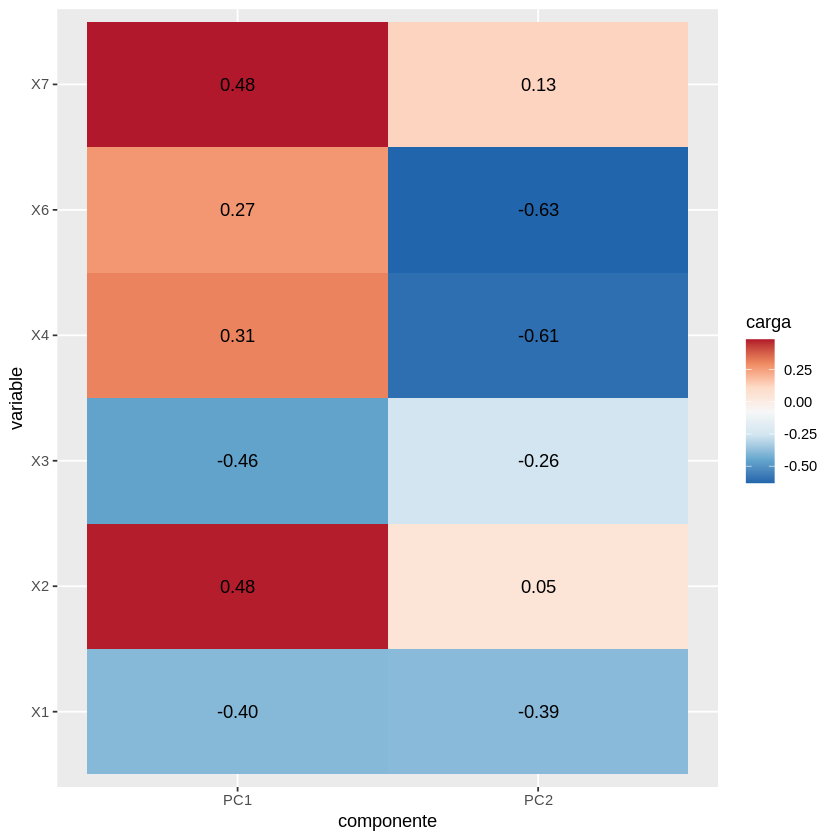

In [42]:
componentes_2<-prcomp(HATCO_data, center=TRUE, scale.=TRUE, rank.=2)
cargas<-componentes_2$rotation
cargasdf<-as.data.frame(cargas)
cargasdf$medicion<-rownames(cargasdf)
cargasheat<-reshape2::melt(cargasdf)
colnames(cargasheat)<-c("variable","componente","carga")
library(ggplot2)
ggplot(cargasheat,aes(x=componente,y=variable,fill=carga, label=sprintf("%0.2f", round(carga, digits=2))))+geom_tile()+scale_fill_distiller(palette="RdBu")+geom_text()

X1        X2        X3        X4        X6        X7 
0.6576196 0.5801483 0.6457412 0.8815351 0.8723345 0.6156285


Loadings:
   RC1    RC2   
X1 -0.788  0.193
X2  0.714  0.266
X3 -0.803       
X4  0.101  0.933
X6         0.934
X7  0.764  0.180

                 RC1   RC2
SS loadings    2.369 1.884
Proportion Var 0.395 0.314
Cumulative Var 0.395 0.709

Using medicion as id variables



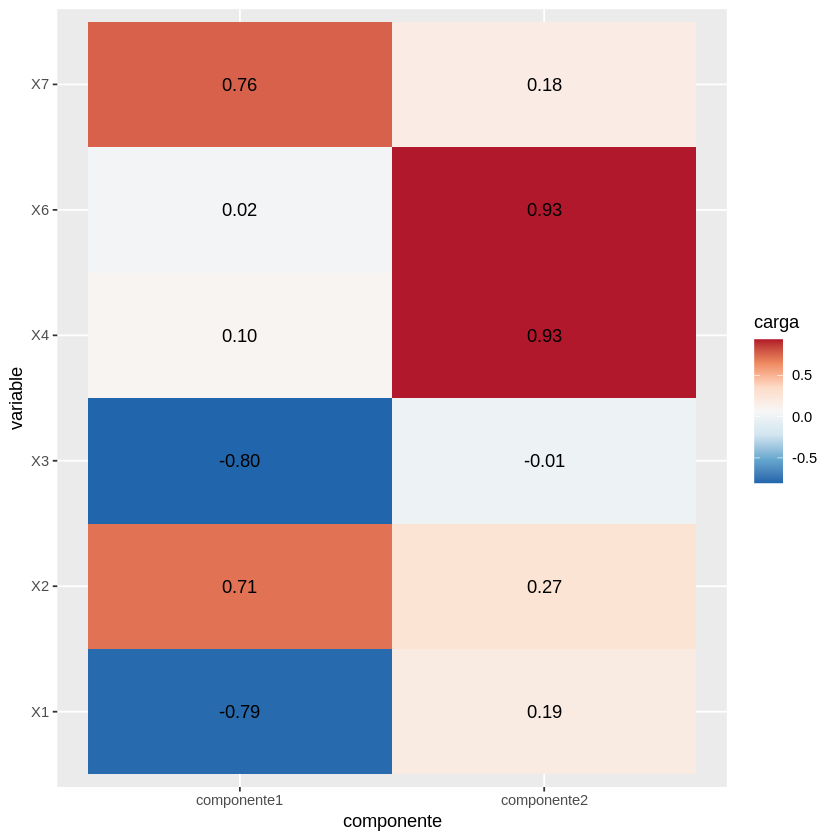

In [45]:
componentes4<-principal(HATCO_data,nfactors=2,rotate="varimax")
# rotaciones disponibles: "none", "varimax", "quatimax", "promax", "oblimin", "simplimax", and "cluster"
componentes4$communality # proporcion de la varianza representada por cada componente
componentes4$loadings
componente1<-componentes4$loadings[,1]
componente2<-componentes4$loadings[,2]


cargasdfr<-as.data.frame(cbind(componente1,componente2))
cargasdfr$medicion<-rownames(cargasdfr)
cargasheatr<-reshape2::melt(cargasdfr)
colnames(cargasheatr)<-c("variable","componente","carga")
ggplot(cargasheatr,aes(x=componente,y=variable,fill=carga, label=sprintf("%0.2f", round(carga, digits=2))))+geom_tile()+scale_fill_distiller(palette="RdBu")+geom_text()

Después de la rotación de ejes se encuentra mayor claridad entre la representación de los dos componentes, siendo más diferenciada esta y más precisa respecto a la información que cada uno contiene sobre las variables iniciales. Se encuentra claramente que el primer componente resume la infrmación de las variables X1, X2, X3 y X7, y la segunda resume a X6 y X4.
En el contexto del proyecto, el primer componente resume la información de precios y envíos relacionados con la calidad del producto, y el segundo la información de imagen del fabricante y de fuerza de ventas de este.
Como resultado de esto se puede nombrar el primer factor como **imagen sobre el producto** y servicio, y el segundo como la **percepción general** sobre el fabricante.

### **ANÁLISIS FACTORIAL DE 3 COMPONENTES**

- ### **FACTOR IMAGEN SOBRE EL PRODUCTO**: {X1, X2, X3, X7} -> {Manufacturer's image,  Service}

- ### **FACTOR PERCEPCION GENERAL**: {X4, X6} -> {Delivery speed,  Product quality }

#**FIN**